<h1 style='text-align:center; color: #00bfff;'>Investigate a Dataset</h1>
<h3 style='text-align:center; color: #00bfff;'>Udacity Data Analysis Project 1</h3>

### Introduction


For this project, we will conduct data analysis and create a file to share that documents our findings. We start by taking a look at the dataset and brainstorming what questions we could answer using it. Then we use Pandas and NumPy to answer the questions we are most interested in, and create a report sharing the answers. 

In [95]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [96]:
data = pd.read_csv('titanic-data.csv')

In [97]:
data.shape

(891, 12)

The dataset contains 12 variables and 891 records. Now let's take a look at some of the records.

In [98]:

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's see the distribution of "Fare" by using histogram.

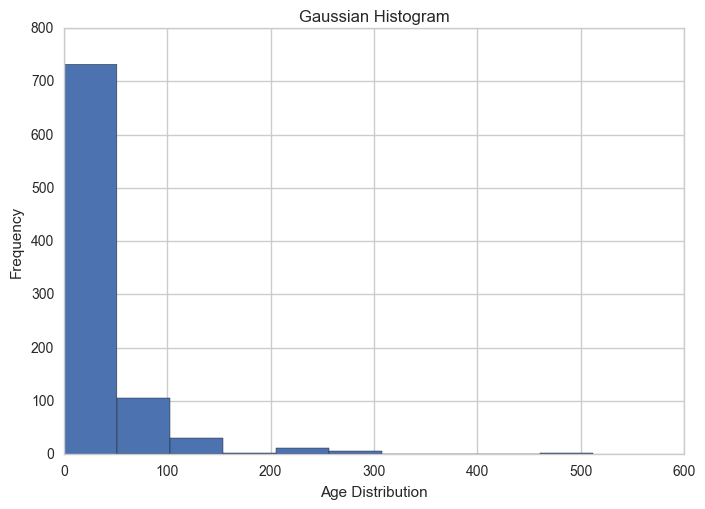

In [99]:
plt.hist(data['Fare'])
plt.title('Gaussian Histogram')
plt.xlabel('Age Distribution')
plt.ylabel('Frequency')
plt.show()


<strong>Handling missing value:</strong> the data has missing values "NaN". Sometimes, it's important that we clean the missing data before we can actually analyze it. In addition, we choose to ignore "Cabin" variable and focus more on "Pclass", "Sex" and "Age" variables on which we will conduct our analysis.

In [100]:
chosen_data = data.loc[:,['Survived', 'Pclass', 'Fare', 'Sex', 'Age']]
clean_data = chosen_data.dropna()

In [101]:
clean_data.shape

(714, 5)

After omitting the missing data, we have a dataset of 714 records. We'll look at the statistics of our numerical data to get some insights.

Let's take a look at the proportion of each class among the passengers' population using pie chart.

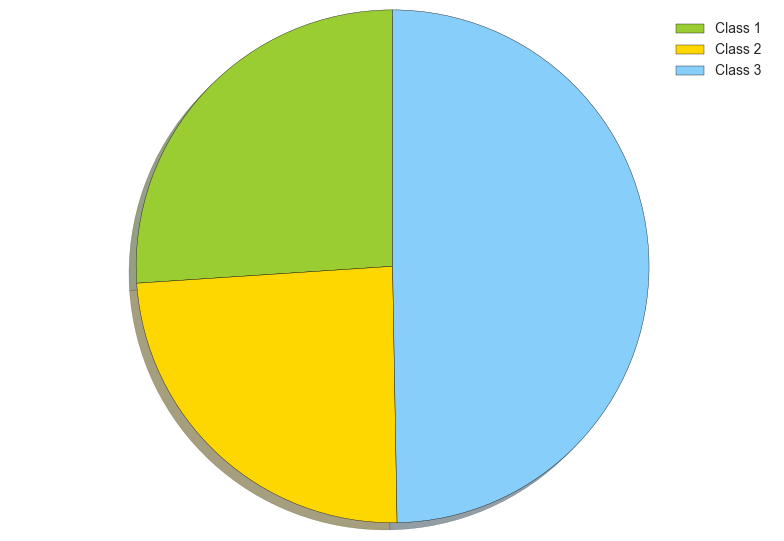

In [102]:
# Data to plot
labels = 'Class 1', 'Class 2', 'Class 3'
sizes = clean_data.groupby('Pclass').size() * 100 / clean_data.shape[0]
colors = 'yellowgreen', 'gold', 'lightskyblue'
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Class 3 had the most passengers (49.7% of the population) whereas Class 1 and Class 2 share the rest of the population.<br>
We also want to explore the correlation between Class and Fare.

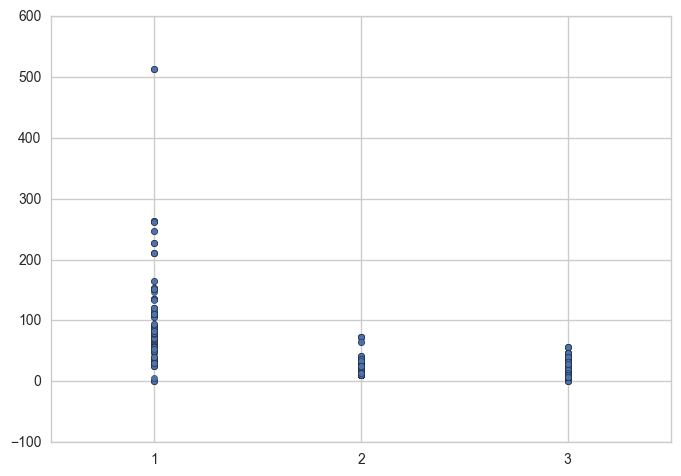

In [103]:
plt.scatter(clean_data['Pclass'], clean_data['Fare'])
plt.xticks([1.0,2.0,3.0], [1,2,3])
plt.show()

The fare passengers pay is higher for Class 1 which indicates that Class 1 has more rich passengers than other classes.

In [104]:
clean_data.describe()

,Survived,Pclass,Fare,Age
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,34.694514,29.699118
std,0.491460,0.838250,52.918930,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,1.000000,8.050000,20.125000
50%,0.000000,2.000000,15.741700,28.000000
75%,1.000000,3.000000,33.375000,38.000000
max,1.000000,3.000000,512.329200,80.000000


The survival rate is 0.41 and its standard deviation is 0.49, and the average age of the passengers is 29.70 and its standard deviation is 14.53. <br>
<strong>Our question is:</strong> "Do Age and Sex actually decide passenger's survival?". To answer this question, we'll calculate the correlation between Survived and Sex/Age variable. First, let's visualize its relationship.

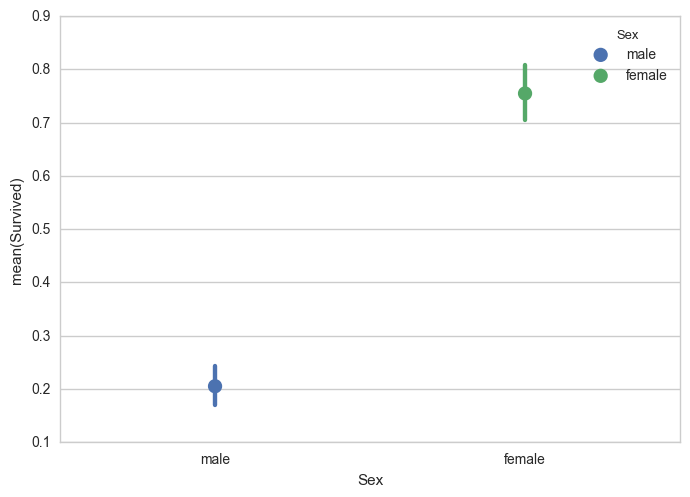

In [105]:
sns.pointplot(x='Sex', y='Survived', hue='Sex', data=clean_data);
plt.show()

Female passengers have significantly high chance to survive than male passengers, and this can be partly explained by our culture that gives women high priority.

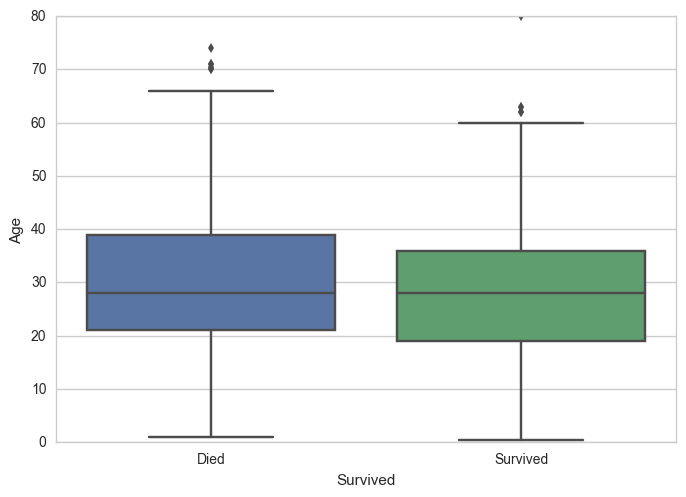

In [106]:
sns.boxplot(x="Survived", y="Age", data=clean_data)
plt.xticks([0,1], ['Died', 'Survived'])
plt.show()

Those who are alive are more likely to be younger than the dead ones; half of them have age between 19 to 36. 

In [107]:
clean_data.corr()

,Survived,Pclass,Fare,Age
Survived,1.000000,-0.359653,0.268189,-0.077221
Pclass,-0.359653,1.000000,-0.554182,-0.369226
Fare,0.268189,-0.554182,1.000000,0.096067
Age,-0.077221,-0.369226,0.096067,1.000000


The correlation efficient of "Age" is -0.25 which means it's inversely propotional to "Survived". Let's use 1 tailed 2 sample t test to verify it. We want to test the hypothesis at the a = 0.05 level (95%) <br>

H0: the average age of the survived population is less than that of the dead population.
<br>
HA: the average age of the survived population is equal or higher that of the dead population.
<br>
In other words:
<br>
H0: µ1 = µ2 
<br>
HA: µ1 ≠ µ2


In [108]:
survived=clean_data[clean_data['Survived'==1]

In [109]:
dead=clean_data[clean_data['Survived']==0]

In [115]:
survived["Survived"].count()


290

In [117]:
dead["Survived"].count()

424

In [118]:
survived["Age"].describe()


count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [119]:
dead["Age"].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [121]:
t_stat=(28.34-30.63)/((14.95**2)/290+(14.17**2)/424)**0.5
t_stat

-2.052959754007439

Degree of freedom is 181, so our t critical value is -1.66

Our t statistic is less than t critical value, so we reject the null hypothesis. It's likely that the average age of those who survived is lower than that of the dead. However, we don't know whether being young actually leads to passenger's survival.

<hr>
<p style="text-align:center; text-decoration: none !important ">Contact <a href="https://www.linkedin.com/in/thong-tran-0b023299">Buu Thong Tran</a><p>